## Gradient Descent for Supervised Learning

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).

Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.


## Cost function

We initalize Gradient Descent by filling  with random values. We improve it gradually by taking one step at a time, each step attempting to decrease the cost function until the algorithm converges to a minimum. In our case we will be using the Mean Squared Error, or MSE for implementation.

## Learning rate

An important parameter in the Gradient Descent algorithm is the step size, which is determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to complete many iterations to converge to a minimum and will negatively impact performance. Conversely, if the learning rate is too high, we might jump across the 'valley' of the equation and end up on the other side. This would cause the algorithm to diverge with larger and larger values; ultimately it would fail to find an optimal solution.

## Implementing Gradient Descent

 we need to compute the gradient of the cost function about each model parameter  (e.g., we calculate how much the cost function will change if you change  incrementally). We compute this by taking the partial derivative of the cost function.

The example we will use to display gradient descent will be the batch gradient example. 
Which will train data at each step.
For this I'll first import the neccesary libaries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

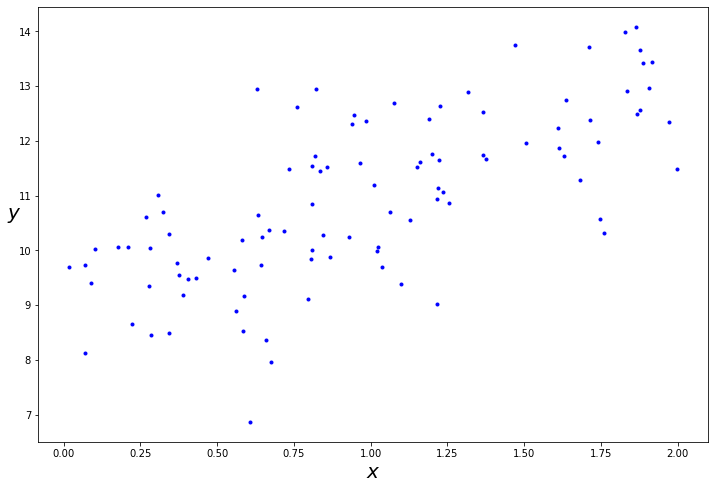

In [2]:
## Generating Random Data for this example using the equation y= 9 + 2x + noise
X = 2 * np.random.rand(100,1)
y = 9 + 2 * X+np.random.randn(100,1)

plt.figure(figsize = (12, 8))
plt.plot(X, y, 'b.')
plt.xlabel('$x$', 
           fontsize=20)
plt.ylabel('$y$', 
           rotation=0, 
           fontsize = 20)
plt.show()

In [4]:
##Initialzing our basic gradient algorithm 
eta = 0.1
n_iterations = 1000
theta = np.random.randn(2,1)
m = 100

X_b = np.c_[np.ones((100, 1)), X]

for i in range(n_iterations):
    grads = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * grads

In [5]:
## The Result of Theta
print(theta)

[[8.99789233]
 [1.98481469]]


As you can see the result is very close to our original distrubtion if we don't account for noise now lets plot the data to visual it

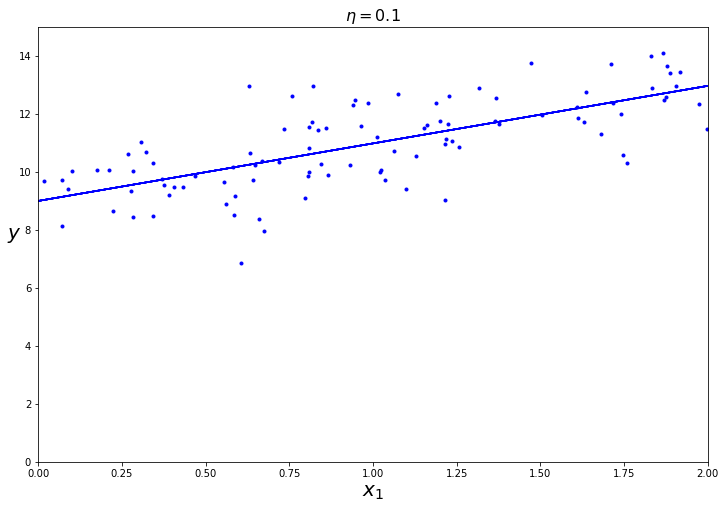

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
y_predict
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=20)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
plt.figure(figsize=(12,8))
plt.ylabel("$y$", rotation=0, fontsize=20)
plt.plot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)